In [1751]:
import pandas as pd 
import numpy as np
import re
import matplotlib.pyplot as plt

In [1752]:
def categorize_title(title:str, patterns:dict):
    for category, pattern in patterns.items():
        if re.search(pattern, title):
            return category
    return 'Uncategorized'  # For rows that don't fit any of the patterns


def get_category(df: pd.DataFrame, column: str, categories: list, cat:str):

    patterns = {
    categories[0]: r'^(?!.*\b\d{4}\b).*$',  # No 4-digit year anywhere in the title
    categories[1]: r'^\b\d{4}\b$',  # Starts with a 4-digit year and nothing else
    categories[2]: r'^\b\d{4}\b.*\bQ[1-4]\b',  # Starts with a year and contains "Q1", "Q2", etc.
    categories[3]: r'^\b\d{4}\b.*\b(JAN|FEB|MAR|APR|MAY|JUN|JUL|AUG|SEP|OCT|NOV|DEC)\b'  # Starts with a year and contains a month name
}

    df['category'] = df[column].apply(categorize_title, patterns=patterns)
    result = df[df['category'] == cat]
    result = result.drop(columns=['category'])
    result = result.dropna()
    result.columns = ['date', 'value']
    result['date'] = pd.to_datetime(result['date'], format='%Y %b')
    result['value'] = result['value'].astype(float)
    result = result.reset_index(drop=True)
    return result



## CPIH

In [1753]:
cpih = pd.read_csv('quanti_data/cpih.csv')

In [1853]:
cpih

Title CPIH ANNUAL RATE 00: ALL ITEMS 2015=100 category
0                 CDID                                    L55O    Other
1    Source dataset ID                                    MM23    Other
2              PreUnit                                     NaN    Other
3                 Unit                                       %    Other
4         Release date                              16-10-2024    Other
..                 ...                                     ...      ...
609           2024 MAY                                     2.8    Month
610           2024 JUN                                     2.8    Month
611           2024 JUL                                     3.1    Month
612           2024 AUG                                     3.1    Month
613           2024 SEP                                     2.6    Month

[614 rows x 3 columns]

In [1754]:
cpih

Title CPIH ANNUAL RATE 00: ALL ITEMS 2015=100
0                 CDID                                    L55O
1    Source dataset ID                                    MM23
2              PreUnit                                     NaN
3                 Unit                                       %
4         Release date                              16-10-2024
..                 ...                                     ...
609           2024 MAY                                     2.8
610           2024 JUN                                     2.8
611           2024 JUL                                     3.1
612           2024 AUG                                     3.1
613           2024 SEP                                     2.6

[614 rows x 2 columns]

In [1755]:
monthly_data = get_category(cpih, 'Title', ['Other','Year', 'Quarter', 'Month'], 'Month')

In [1756]:
monthly_data.to_csv('quanti_data/cpih_monthly.csv', index=False)

## CPIH Medical Services

In [1757]:
cpih_medical = pd.read_csv('quanti_data/cpih_medical.csv')

In [1854]:
cpih_medical

Title CPIH 12mth: Medical services (S) 2015=100 category
0                 CDID                                      L5LF    Other
1    Source dataset ID                                      MM23    Other
2              PreUnit                                       NaN    Other
3                 Unit                                         %    Other
4         Release date                                16-10-2024    Other
..                 ...                                       ...      ...
405           2024 MAY                                       6.0    Month
406           2024 JUN                                       6.0    Month
407           2024 JUL                                       6.0    Month
408           2024 AUG                                       5.8    Month
409           2024 SEP                                       5.8    Month

[410 rows x 3 columns]

In [1758]:
monthly_data_medical = get_category(cpih_medical, 'Title', ['Other','Year', 'Quarter', 'Month'], 'Month')

In [1759]:
monthly_data_medical.to_csv('quanti_data/cpih_medical_monthly.csv', index=False)

## HES


In [1760]:
df = pd.read_csv('quanti_data/HES_M5_OPEN_DATA.csv')

In [1761]:
df

CALENDAR_MONTH_END_DATE  APC_Finished_Consultant  \
0                    24-Aug                  1779709   
1                    24-Jul                  1924755   
2                    24-Jun                  1803082   
3                    24-May                  1912840   
4                    24-Apr                  1851865   
..                      ...                      ...   
204                   7-Aug                  1274667   
205                   7-Jul                  1301280   
206                   7-Jun                  1266654   
207                   7-May                  1307117   
208                   7-Apr                  1194041   

     APC_FCEs_with_a_procedure  APC_Percent_FCEs_with_procedure  \
0                       771329                             0.43   
1                      1115065                             0.58   
2                      1060176                             0.59   
3                      1132815                             0.59   
4                      1102909                             0.60   
..                         ...                              ...   
204                     719457                             0.56   
205                     732105                             0.56   
206                     715102                             0.56   
207                     730827                             0.56   
208                     650418                             0.54   

     APC_Ordinary_Episodes  APC_Day_Case_Episodes  \
0                  1103475                 676234   
1                  1183777                 740978   
2                  1126624                 676458   
3                  1189323                 723517   
4                  1149797                 702068   
..                     ...                    ...   
204                 884214                 390453   
205                 898108                 403172   
206                 876009                 390645   
207                 906009                 401108   
208                 839651                 354390   

     APC_Day_Case_Episodes_with_proc  APC_Percent_Day_Cases_with_proc  \
0                             495560                             0.73   
1                             682257                             0.92   
2                             628675                             0.93   
3                             674431                             0.93   
4                             655541                             0.93   
..                               ...                              ...   
204                           360565                             0.92   
205                           371585                             0.92   
206                           359944                             0.92   
207                           367953                             0.92   
208                           324717                             0.92   

     APC_Finished_Admission_Episodes  APC_Emergency  \
0                            1461354         518319   
1                            1579131         561228   
2                            1479951         542409   
3                            1571634         575755   
4                            1516960         557776   
..                               ...            ...   
204                          1116986         391334   
205                          1141788         397923   
206                          1111356         390411   
207                          1147940         407946   
208                          1045931         387887   

     Outpatient_Total_Appointments  Outpatient_Attended_Appointments  \
0                         11016808                           8414975   
1                         12447345                           9557550   
2                         11345191                           8754674   
3                         11955525                           93

In [1762]:
df['CALENDAR_MONTH_END_DATE'] = df['CALENDAR_MONTH_END_DATE'].str.replace('-', ' 20')

In [1763]:
df['CALENDAR_MONTH_END_DATE'] = df['CALENDAR_MONTH_END_DATE'].str.upper()

In [1764]:
df

CALENDAR_MONTH_END_DATE  APC_Finished_Consultant  \
0                  24 20AUG                  1779709   
1                  24 20JUL                  1924755   
2                  24 20JUN                  1803082   
3                  24 20MAY                  1912840   
4                  24 20APR                  1851865   
..                      ...                      ...   
204                 7 20AUG                  1274667   
205                 7 20JUL                  1301280   
206                 7 20JUN                  1266654   
207                 7 20MAY                  1307117   
208                 7 20APR                  1194041   

     APC_FCEs_with_a_procedure  APC_Percent_FCEs_with_procedure  \
0                       771329                             0.43   
1                      1115065                             0.58   
2                      1060176                             0.59   
3                      1132815                             0.59   
4                      1102909                             0.60   
..                         ...                              ...   
204                     719457                             0.56   
205                     732105                             0.56   
206                     715102                             0.56   
207                     730827                             0.56   
208                     650418                             0.54   

     APC_Ordinary_Episodes  APC_Day_Case_Episodes  \
0                  1103475                 676234   
1                  1183777                 740978   
2                  1126624                 676458   
3                  1189323                 723517   
4                  1149797                 702068   
..                     ...                    ...   
204                 884214                 390453   
205                 898108                 403172   
206                 876009                 390645   
207                 906009                 401108   
208                 839651                 354390   

     APC_Day_Case_Episodes_with_proc  APC_Percent_Day_Cases_with_proc  \
0                             495560                             0.73   
1                             682257                             0.92   
2                             628675                             0.93   
3                             674431                             0.93   
4                             655541                             0.93   
..                               ...                              ...   
204                           360565                             0.92   
205                           371585                             0.92   
206                           359944                             0.92   
207                           367953                             0.92   
208                           324717                             0.92   

     APC_Finished_Admission_Episodes  APC_Emergency  \
0                            1461354         518319   
1                            1579131         561228   
2                            1479951         542409   
3                            1571634         575755   
4                            1516960         557776   
..                               ...            ...   
204                          1116986         391334   
205                          1141788         397923   
206                          1111356         390411   
207                          1147940         407946   
208                          1045931         387887   

     Outpatient_Total_Appointments  Outpatient_Attended_Appointments  \
0                         11016808                           8414975   
1                         12447345                           9557550   
2                         11345191                           8754674   
3                         11955525                           93

In [1765]:
df['CALENDAR_MONTH_END_DATE'] = pd.to_datetime(df['CALENDAR_MONTH_END_DATE'], format='mixed')

In [1766]:
# drop nan columns 
df = df.dropna(axis=1, how='all')

In [1767]:
# sort by date
df = df.sort_values(by='CALENDAR_MONTH_END_DATE')

In [1768]:
df = df.dropna()
df = df.reset_index(drop=True)

In [1769]:
df.to_csv('quanti_data/HES_M5_OPEN_DATA_monthly.csv', index=False)

## Global Dataframe


In [1770]:
df.rename(columns={'CALENDAR_MONTH_END_DATE': 'date'}, inplace=True)

In [1771]:
df['date'] = pd.to_datetime(df['date'], format='%Y %b')

In [1772]:
# change dates to the first of each month
df['date'] = df['date'] + pd.offsets.MonthBegin(-1)

In [1773]:
joined_data = pd.merge(monthly_data, monthly_data_medical, on='date', how='inner').merge(df, on='date', how='inner')

In [1774]:
joined_data.rename(columns={'value_x': 'cpih', 'value_y': 'cpih_medical'}, inplace=True)


In [1775]:
joined_data['year'] = joined_data['date'].dt.year
joined_data['month'] = joined_data['date'].dt.month
joined_data.drop(columns=['date'], inplace=True)

In [1776]:
target = joined_data['cpih_medical']
input_data = joined_data.drop(columns=['cpih_medical'])

In [1777]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(input_data, target, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

In [1778]:
score = model.score(X_test, y_test)

In [1779]:
score

0.8251000565402795

In [1780]:
pip install --upgrade numpy

Note: you may need to restart the kernel to use updated packages.


In [1781]:
# Grid search
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None,10, 50],
    'criterion': [ 'mse', 'poisson'],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=4)
grid_search.fit(input_data, target)
best_params = grid_search.best_params_


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3] END criterion=mse, max_depth=None, n_estimators=200;, score=nan total time=   0.0s
[CV 3/3] END criterion=mse, max_depth=None, n_estimators=200;, score=nan total time=   0.0s
[CV 3/3] END criterion=mse, max_depth=None, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END criterion=mse, max_depth=None, n_estimators=100;, score=nan total time=   0.0s
[CV 3/3] END criterion=mse, max_depth=None, n_estimators=300;, score=nan total time=   0.0s
[CV 1/3] END criterion=mse, max_depth=None, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END criterion=mse, max_depth=None, n_estimators=200;, score=nan total time=   0.0s
[CV 1/3] END criterion=mse, max_depth=10, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END criterion=mse, max_depth=10, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END criterion=mse, max_depth=None, n_estimators=300;, score=nan total time=   0.0s
[CV 3/3] END criterion=

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
27 fits failed out of a total of 54.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/si

In [1782]:
best_model = RandomForestRegressor(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], criterion=best_params['criterion'], random_state=42)

In [1783]:
best_model.fit(X_train, y_train)

RandomForestRegressor(criterion='poisson', n_estimators=300, random_state=42)

In [1784]:
model.score(X_test, y_test)

0.8251000565402795

In [1785]:
feature_importances = best_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})


importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

Feature  Importance
0                               cpih    0.538289
18                              year    0.202736
15   Outpatient_Follow_Up_Attendance    0.045719
19                             month    0.026292
8    APC_Finished_Admission_Episodes    0.023865
13        Outpatient_DNA_Appointment    0.022246
9                      APC_Emergency    0.020818
4              APC_Ordinary_Episodes    0.019922
6    APC_Day_Case_Episodes_with_proc    0.015562
1            APC_Finished_Consultant    0.014733
16      Outpatient_Attendance_Type_1    0.011206
5              APC_Day_Case_Episodes    0.009520
10     Outpatient_Total_Appointments    0.009292
3    APC_Percent_FCEs_with_procedure    0.008458
11  Outpatient_Attended_Appointments    0.007254
17      Outpatient_Attendance_Type_2    0.006606
2          APC_FCEs_with_a_procedure    0.005815
7    APC_Percent_Day_Cases_with_proc    0.005765
12       Outpatient_Percent_Attended    0.003972
14            Outpatient_Percent_DNA    0.001932

In [1786]:
X_test

cpih  APC_Finished_Consultant  APC_FCEs_with_a_procedure  \
30    1.2                  1467075                     851327   
171   2.1                  1704980                    1006683   
84    1.7                  1512716                     907894   
198   4.7                  1837878                    1096029   
60    2.8                  1397794                     819917   
155   1.5                  1462408                     837589   
45    3.4                  1421276                     810344   
181   7.9                  1711918                    1031365   
9     2.4                  1333602                     754163   
195   6.4                  1763134                    1058340   
136   2.4                  1707413                    1008544   
186   9.6                  1687969                    1020323   
206   2.8                  1803082                    1060176   
126   2.8                  1738829                    1038096   
15    4.2                  1400417                     818239   
73    2.4                  1520070                     925257   
165   0.9                  1338786                     753922   
18    4.2                  1431636                     831792   
167   1.0                  1604914                     937632   
93    0.5                  1572128                     942985   
75    2.5                  1574532                     968366   
55    4.1                  1497348                     907858   
147   2.0                  1849645                    1104461   
109   0.7                  1629157                     976138   
108   0.7                  1598233                     968004   
142   1.8                  1652040                     970533   
25    2.1                  1347020                     769303   
125   2.8                  1649228                     990020   
16    4.4                  1273247                     720602   
172   3.0                  1600590                     935142   
191   8.9                  1796790                    1059615   
69    2.4                  1520842                     914621   
101   0.2                  1612957                     982969   
67    2.4                  1533541                     933004   
104   0.5                  1595762                     936397   
132   2.2                  1649327                     965935   
207   3.1                  1924755                    1115065   
95    0.3                  1641578                    1001810   
82    1.6                  1454296                     883981   
159   1.1                  1380268                     767566   
196   6.3                  1770916                    1070853   
162   0.9                  1574723                     930986   

     APC_Percent_FCEs_with_procedure  APC_Ordinary_Episodes  \
30                              0.58                 990168   
171                             0.59                1119816   
84                              0.60                 989730   
198                             0.60                1154568   
60                              0.59                 932595   
155                             0.57                 975066   
45                              0.57                 961663   
181                             0.60                1086088   
9                               0.57                 900553   
195                             0.60                1117350   
136                             0.59                1101091   
186                             0.60                1061715   
206                             0.59                1126624   
126                             0.60                1112150   
15                              0.58                 939690   
73                              0.61                 992763   
165                             0.56                 942727   
18                              0.58                 960575   
167         

In [1787]:
test_df = y_test.to_frame()

In [1788]:
a  = np.array(test_df['cpih_medical'])

In [1789]:
# predict on first row of test data
p = best_model.predict(X_test)

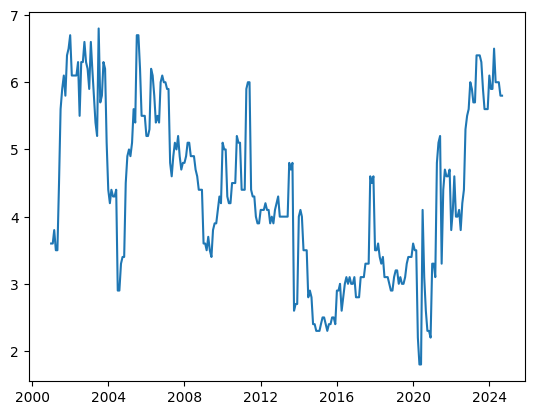

In [1790]:
x = monthly_data_medical['date']
y = monthly_data_medical['value'] 
plt.plot(x, y, label='cpih_medical')

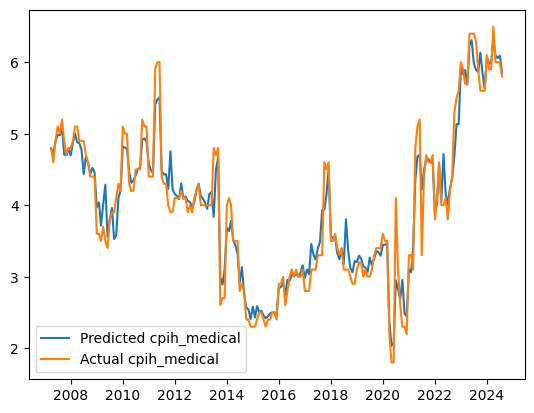

In [1791]:
from datetime import datetime
dates = pd.to_datetime(joined_data[['year','month']].assign(day=1))
dates = list(dates)
plt.plot(dates, best_model.predict(input_data), label='Predicted cpih_medical')
plt.plot(dates, target, label='Actual cpih_medical')
plt.legend()

In [1792]:
# metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test, best_model.predict(X_test))
r2 = r2_score(y_test, best_model.predict(X_test))
mae = mean_absolute_error(y_test, best_model.predict(X_test))
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 0.21376743121693145
R2 Score: 0.8287507329043233
Mean Absolute Error: 0.3460714285714283


In [1793]:
one_pred_data = input_data[['cpih','year']]
X_train_one, X_test_one, y_train_one, y_test_one = train_test_split(one_pred_data, target, test_size=0.4, random_state=42)
model_one = RandomForestRegressor(n_estimators=150, criterion='poisson', random_state=42)
model_one.fit(X_train_one, y_train_one)

RandomForestRegressor(criterion='poisson', n_estimators=150, random_state=42)

In [1794]:
model_one.score(X_test_one, y_test_one)

0.7237554919366846

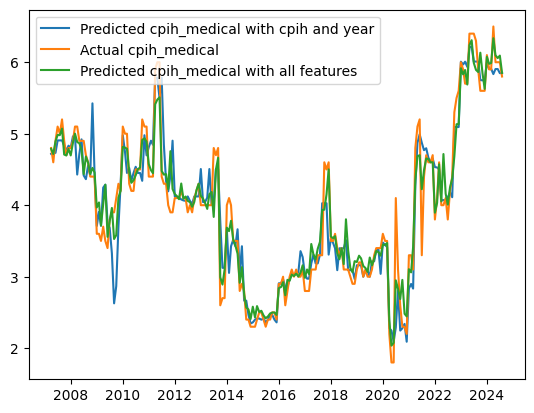

In [1795]:
from datetime import datetime
dates = pd.to_datetime(joined_data[['year','month']].assign(day=1))
dates = list(dates)
plt.plot(dates, model_one.predict(one_pred_data), label='Predicted cpih_medical with cpih and year')
plt.plot(dates, target, label='Actual cpih_medical')
plt.plot(dates, best_model.predict(input_data), label='Predicted cpih_medical with all features')
plt.legend()

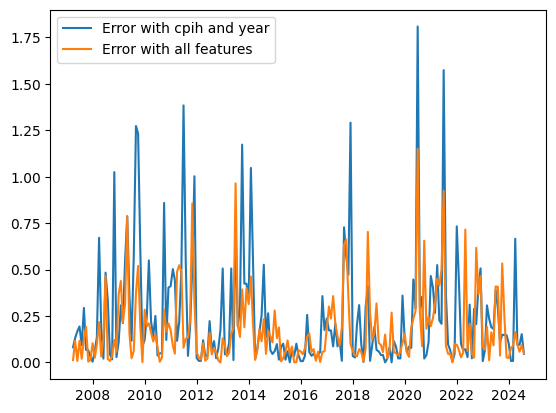

In [1796]:
plt.plot(dates, abs(model_one.predict(one_pred_data) - target), label='Error with cpih and year')
plt.plot(dates, abs(best_model.predict(input_data) - target), label='Error with all features')
plt.legend()

In [1797]:
# Use Prophet for time series modeling
from prophet import Prophet

input_data['ds'] = dates

In [1798]:
dates

[Timestamp('2007-04-01 00:00:00'),
 Timestamp('2007-05-01 00:00:00'),
 Timestamp('2007-06-01 00:00:00'),
 Timestamp('2007-07-01 00:00:00'),
 Timestamp('2007-08-01 00:00:00'),
 Timestamp('2007-09-01 00:00:00'),
 Timestamp('2007-10-01 00:00:00'),
 Timestamp('2007-11-01 00:00:00'),
 Timestamp('2007-12-01 00:00:00'),
 Timestamp('2008-01-01 00:00:00'),
 Timestamp('2008-02-01 00:00:00'),
 Timestamp('2008-03-01 00:00:00'),
 Timestamp('2008-04-01 00:00:00'),
 Timestamp('2008-05-01 00:00:00'),
 Timestamp('2008-06-01 00:00:00'),
 Timestamp('2008-07-01 00:00:00'),
 Timestamp('2008-08-01 00:00:00'),
 Timestamp('2008-09-01 00:00:00'),
 Timestamp('2008-10-01 00:00:00'),
 Timestamp('2008-11-01 00:00:00'),
 Timestamp('2008-12-01 00:00:00'),
 Timestamp('2009-01-01 00:00:00'),
 Timestamp('2009-02-01 00:00:00'),
 Timestamp('2009-03-01 00:00:00'),
 Timestamp('2009-04-01 00:00:00'),
 Timestamp('2009-05-01 00:00:00'),
 Timestamp('2009-06-01 00:00:00'),
 Timestamp('2009-07-01 00:00:00'),
 Timestamp('2009-08-

In [1799]:
train, test = input_data[int(len(input_data)*0.7):int(len(input_data)*0.9)], input_data[int(len(input_data)*0.9):]

In [1800]:
train['y'] = target.iloc[int(len(input_data)*0.7):int(len(input_data)*0.9)]


/var/folders/c7/tz9fbdy52kg7nrm3g0wp_tv00000gn/T/ipykernel_7102/2485869112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['y'] = target.iloc[int(len(input_data)*0.7):int(len(input_data)*0.9)]


In [1801]:
train = train[['ds', 'y']]

In [1802]:
m = Prophet()
m.fit(train)

14:17:12 - cmdstanpy - INFO - Chain [1] start processing
14:17:12 - cmdstanpy - INFO - Chain [1] done processing


In [1803]:
test = test[['ds']]

In [1804]:
test

ds
188 2022-12-01
189 2023-01-01
190 2023-02-01
191 2023-03-01
192 2023-04-01
193 2023-05-01
194 2023-06-01
195 2023-07-01
196 2023-08-01
197 2023-09-01
198 2023-10-01
199 2023-11-01
200 2023-12-01
201 2024-01-01
202 2024-02-01
203 2024-03-01
204 2024-04-01
205 2024-05-01
206 2024-06-01
207 2024-07-01
208 2024-08-01

In [1805]:
forecast = m.predict(test)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


ds      yhat  yhat_lower  yhat_upper
16 2024-04-01  5.309683    4.360297    6.179540
17 2024-05-01  5.065077    4.181667    5.970506
18 2024-06-01  5.204141    4.354212    6.049536
19 2024-07-01  6.129507    5.218126    7.089581
20 2024-08-01  5.997986    5.049507    6.841272

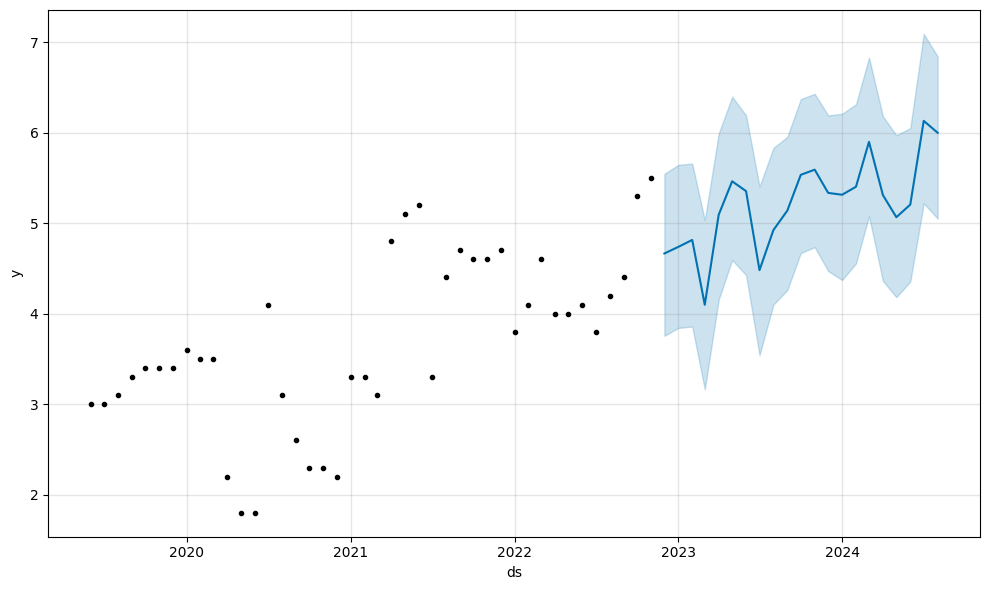

In [1806]:
plot = m.plot(forecast)

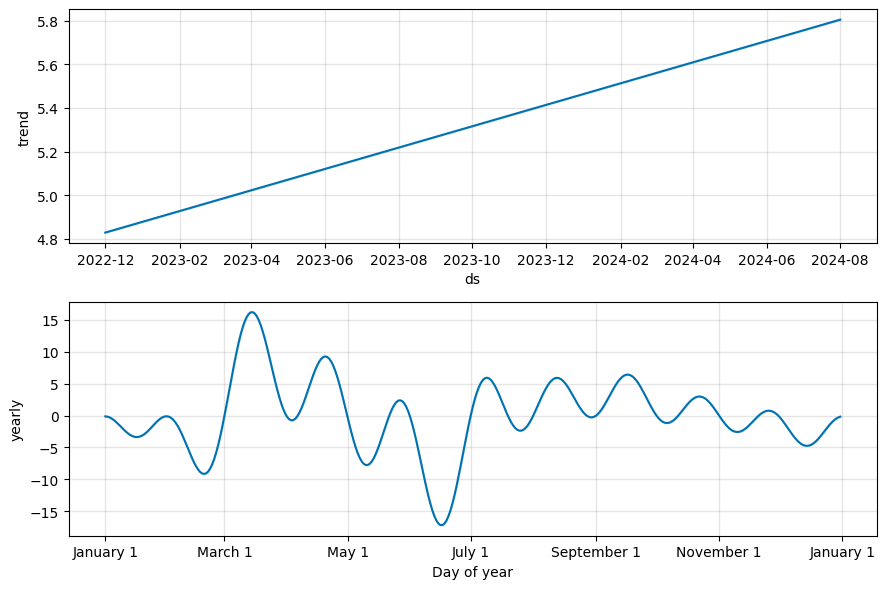

In [1807]:
components = m.plot_components(forecast)

In [1808]:
joined_data.to_csv('quanti_data/joined_data.csv', index=False)

In [1809]:
recent = joined_data[(joined_data['year'] >= 2024)& (joined_data['month'] >= 5)]
old = joined_data[(joined_data['year'] < 2024) | (joined_data['month'] < 5)]

target, data = old['cpih_medical'], old.drop(columns=['cpih_medical'])

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=200,criterion='poisson', random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(criterion='poisson', n_estimators=200, random_state=42)

In [1810]:
model.score(X_test, y_test)

0.8077768006617122

In [1811]:
model.fit(data, target)

RandomForestRegressor(criterion='poisson', n_estimators=200, random_state=42)

In [1812]:
dates = pd.to_datetime(recent[['year','month']].assign(day=1))

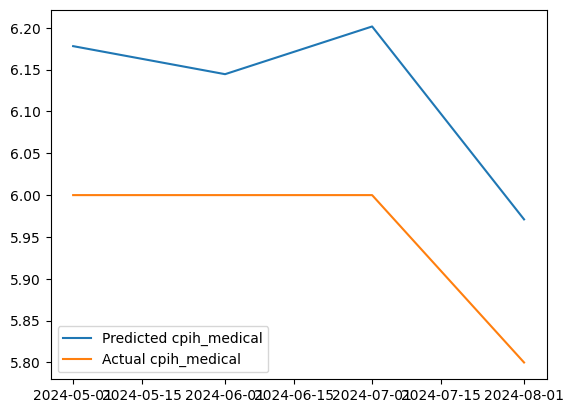

In [1813]:
plt.plot(dates, model.predict(recent.drop(columns=['cpih_medical'])), label='Predicted cpih_medical')
plt.plot(dates, recent['cpih_medical'], label='Actual cpih_medical')
plt.legend()

In [1814]:
joined_data['quarter'] = joined_data['month'].apply(lambda x: (x-1)//3 + 1)

In [1815]:
lag_test_data = joined_data.copy()
for lag in range(1, 4):  # Lag by 1, 2, and 3 months
    lag_test_data[f'cpih_medical_lag_{lag}'] = joined_data['cpih_medical'].shift(lag)
    lag_test_data[f'cpih_lag_{lag}'] = joined_data['cpih'].shift(lag)


In [1816]:
lag_test_data = lag_test_data.dropna()

In [1817]:
old, recent = lag_test_data[lag_test_data['year'] < 2024], lag_test_data[lag_test_data['year'] >= 2024]

target, data = old['cpih_medical'], old.drop(columns=['cpih_medical'])


In [1818]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, criterion='poisson', random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(criterion='poisson', random_state=42)

In [1819]:
model.score(X_test, y_test)

0.7708450165840202

In [1820]:
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})


importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

Feature  Importance
21                cpih_medical_lag_1    0.633301
23                cpih_medical_lag_2    0.152079
0                               cpih    0.066691
18                              year    0.024363
15   Outpatient_Follow_Up_Attendance    0.019122
26                        cpih_lag_3    0.010712
22                        cpih_lag_1    0.008224
9                      APC_Emergency    0.007911
25                cpih_medical_lag_3    0.006765
24                        cpih_lag_2    0.006605
19                             month    0.006484
6    APC_Day_Case_Episodes_with_proc    0.006281
13        Outpatient_DNA_Appointment    0.005951
1            APC_Finished_Consultant    0.005883
10     Outpatient_Total_Appointments    0.004855
4              APC_Ordinary_Episodes    0.004096
11  Outpatient_Attended_Appointments    0.004020
16      Outpatient_Attendance_Type_1    0.003972
17      Outpatient_Attendance_Type_2    0.003784
8    APC_Finished_Admission_Episodes    0.003739
3    APC_Percent_FCEs_with_procedure    0.003713
20                           quarter    0.003014
5              APC_Day_Case_Episodes    0.002795
2          APC_FCEs_with_a_procedure    0.002133
12       Outpatient_Percent_Attended    0.001685
7    APC_Percent_Day_Cases_with_proc    0.000976
14            Outpatient_Percent_DNA    0.000846

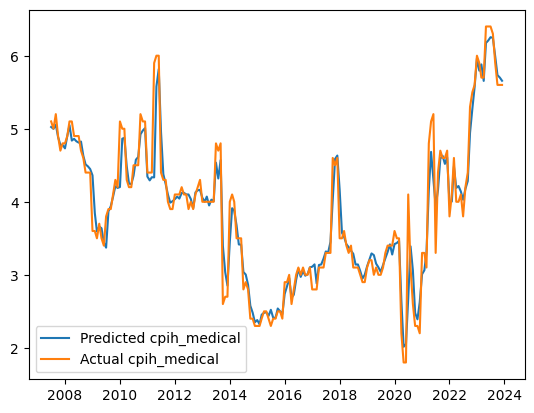

In [1821]:
dates = pd.to_datetime(data[['year','month']].assign(day=1))
plt.plot(dates, model.predict(data), label='Predicted cpih_medical')
plt.plot(dates, target, label='Actual cpih_medical')  
plt.legend()

In [1822]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(target, model.predict(data))
r2 = r2_score(target, model.predict(data))
mae = mean_absolute_error(target, model.predict(data))

In [1823]:
print(f'Mean Squared Error: {mse:0.2f}')
print(f'R2 Score: {r2:0.2f}')
print(f'Mean Absolute Error: {mae:0.2f}')



Mean Squared Error: 0.07
R2 Score: 0.93
Mean Absolute Error: 0.15


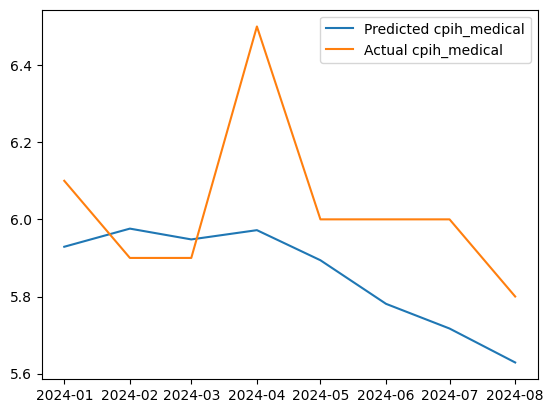

In [1824]:
dates = pd.to_datetime(recent[['year','month']].assign(day=1))
t = recent['cpih_medical']
i = recent.drop(columns='cpih_medical')
plt.plot(dates, model.predict(i), label='Predicted cpih_medical')
plt.plot(dates, t, label='Actual cpih_medical')  
#plt.plot(dates, recent['cpih'], label='Previous month cpih_medical')
plt.legend()

In [1825]:
# metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(t, model.predict(i))
mae = mean_absolute_error(t, model.predict(i))
r2 = r2_score(t, model.predict(i))
print(f'MSE: {mse}, MAE: {mae}, R2: {r2}')

MSE: 0.0605790000000009, MAE: 0.20025000000000126, R2: -0.5385142857143095


In [1826]:
input_data.drop(columns=['ds'], inplace=True)

In [1827]:
lag_test_data

cpih  cpih_medical  APC_Finished_Consultant  APC_FCEs_with_a_procedure  \
3     2.0           5.1                  1301280                     732105   
4     2.0           5.0                  1274667                     719457   
5     2.0           5.2                  1225860                     691203   
6     2.3           4.9                  1354103                     769356   
7     2.2           4.7                  1324595                     757527   
..    ...           ...                      ...                        ...   
204   3.0           6.5                  1851865                    1102909   
205   2.8           6.0                  1912840                    1132815   
206   2.8           6.0                  1803082                    1060176   
207   3.1           6.0                  1924755                    1115065   
208   3.1           5.8                  1779709                     771329   

     APC_Percent_FCEs_with_procedure  APC_Ordinary_Episodes  \
3                               0.56                 898108   
4                               0.56                 884214   
5                               0.56                 851954   
6                               0.57                 919701   
7                               0.57                 895422   
..                               ...                    ...   
204                             0.60                1149797   
205                             0.59                1189323   
206                             0.59                1126624   
207                             0.58                1183777   
208                             0.43                1103475   

     APC_Day_Case_Episodes  APC_Day_Case_Episodes_with_proc  \
3                   403172                           371585   
4                   390453                           360565   
5                   373906                           345563   
6                   434402                           399532   
7                   429173                           396175   
..                     ...                              ...   
204                 702068                           655541   
205                 723517                           674431   
206                 676458                           628675   
207                 740978                           682257   
208                 676234                           495560   

     APC_Percent_Day_Cases_with_proc  APC_Finished_Admission_Episodes  ...  \
3                               0.92                          1141788  ...   
4                               0.92                          1116986  ...   
5                               0.92                          1079019  ...   
6                               0.92                          1190762  ...   
7                               0.92                          1166019  ...   
..                               ...                              ...  ...   
204                             0.93                          1516960  ...   
205                             0.93                          1571634  ...   
206                             0.93                          1479951  ...   
207                             0.92                          1579131  ...   
208                             0.73                          1461354  ...   

     Outpatient_Attendance_Type_2  year  month  quarter  cpih_medical_lag_1  \
3                         3230369  2007      7        3                 4.9   
4                         3070449  2007      8        3                 5.1   
5                         3040218  2007      9        3                 5.0   
6                         3477759  2007     10        4                 5.2   
7                         3390647  2007     11        4                 4.9   
..                            ...   ...    ...      ...                 ...   
204                       6131796  2024      4      

In [1828]:
lag_test_data
old, new = lag_test_data[(lag_test_data['year'] < 2022) & (lag_test_data['year'] >= 2020)], lag_test_data[(lag_test_data['year'] >= 2022) & (lag_test_data['year'] < 2024)]

In [1829]:
new

cpih  cpih_medical  APC_Finished_Consultant  APC_FCEs_with_a_procedure  \
177   4.9           3.8                  1550474                     911186   
178   5.5           4.1                  1527414                     915751   
179   6.2           4.6                  1714165                    1019991   
180   7.8           4.0                  1558069                     922584   
181   7.9           4.0                  1711918                    1031365   
182   8.2           4.1                  1628785                     978333   
183   8.8           3.8                  1634051                     984842   
184   8.6           4.2                  1656938                    1012816   
185   8.8           4.4                  1649802                    1008170   
186   9.6           5.3                  1687969                    1020323   
187   9.3           5.5                  1757335                    1070336   
188   9.2           5.6                  1617749                     936621   
189   8.8           6.0                  1721761                    1032694   
190   9.2           5.9                  1607104                     972552   
191   8.9           5.7                  1796790                    1059615   
192   7.8           5.7                  1603494                     950951   
193   7.9           6.4                  1791273                    1078024   
194   7.3           6.4                  1800521                    1095312   
195   6.4           6.4                  1763134                    1058340   
196   6.3           6.3                  1770916                    1070853   
197   6.3           5.9                  1748051                    1052143   
198   4.7           5.6                  1837878                    1096029   
199   4.2           5.6                  1877347                    1134624   
200   4.2           5.6                  1716509                     992164   

     APC_Percent_FCEs_with_procedure  APC_Ordinary_Episodes  \
177                             0.59                1013330   
178                             0.60                 970994   
179                             0.60                1086650   
180                             0.59                1011366   
181                             0.60                1086088   
182                             0.60                1040393   
183                             0.60                1039296   
184                             0.61                1036926   
185                             0.61                1029335   
186                             0.60                1061715   
187                             0.61                1084288   
188                             0.58                1057154   
189                             0.60                1074996   
190                             0.61                 991248   
191                             0.59                1109410   
192                             0.59                1030824   
193                             0.60                1127739   
194                             0.61                1118210   
195                             0.60                1117350   
196                             0.60                1108954   
197                             0.60                1098444   
198                             0.60                1154568   
199                             0.60                1157507   
200                             0.58                1122013   

     APC_Day_Case_Episodes  APC_Day_Case_Episodes_with_proc  \
177                 537144                           505222   
178                 556420                           522051   
179                 627515                           587235   
180                 546703                           512434   
181                 625830                           587559   
182                 588392                           552582   
183         

In [1830]:
new_target, new_data = new['cpih_medical'], new.drop(columns=['cpih_medical'])
old_target, old_data = old['cpih_medical'], old.drop(columns=['cpih_medical'])


In [1831]:
model = RandomForestRegressor(n_estimators=100, criterion='poisson', random_state=42)
model.fit(old_data, old_target)

                              

RandomForestRegressor(criterion='poisson', random_state=42)

In [1832]:
model.predict(new_data)


array([4.359, 4.222, 4.295, 4.443, 4.434, 4.505, 4.387, 4.364, 4.389,
       4.445, 4.24 , 4.327, 4.213, 4.162, 4.283, 4.381, 4.112, 4.313,
       4.3  , 4.277, 4.275, 4.111, 4.11 , 4.111])

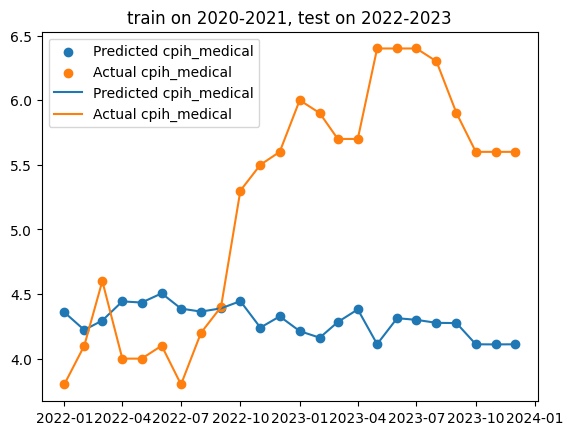

In [1833]:
dates = pd.to_datetime(new_data[['year','month']].assign(day=1))
plt.scatter(dates, model.predict(new_data), label='Predicted cpih_medical')
plt.scatter(dates, new_target, label='Actual cpih_medical')
plt.plot(dates, model.predict(new_data), label='Predicted cpih_medical')
plt.plot(dates, new_target, label='Actual cpih_medical')
plt.title('train on 2020-2021, test on 2022-2023')
plt.legend()


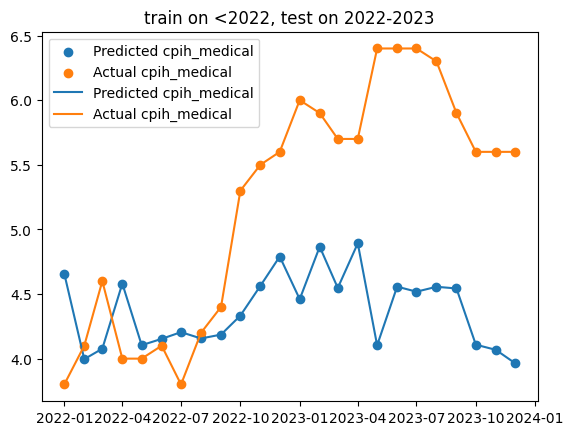

In [1834]:
old_bis = lag_test_data[lag_test_data['year'] < 2022]
new_bis = new.copy()
train,target = old_bis.drop(columns=['cpih_medical']), old_bis['cpih_medical']
model = RandomForestRegressor(n_estimators=100, criterion='poisson', random_state=42)
model.fit(train, target)
dates = pd.to_datetime(new_bis[['year','month']].assign(day=1))
plt.scatter(dates, model.predict(new_bis.drop(columns=['cpih_medical'])), label='Predicted cpih_medical')
plt.scatter(dates, new_bis['cpih_medical'], label='Actual cpih_medical')
plt.plot(dates, model.predict(new_bis.drop(columns=['cpih_medical'])), label='Predicted cpih_medical')
plt.plot(dates, new_bis['cpih_medical'], label='Actual cpih_medical')
plt.title('train on <2022, test on 2022-2023')
plt.legend()


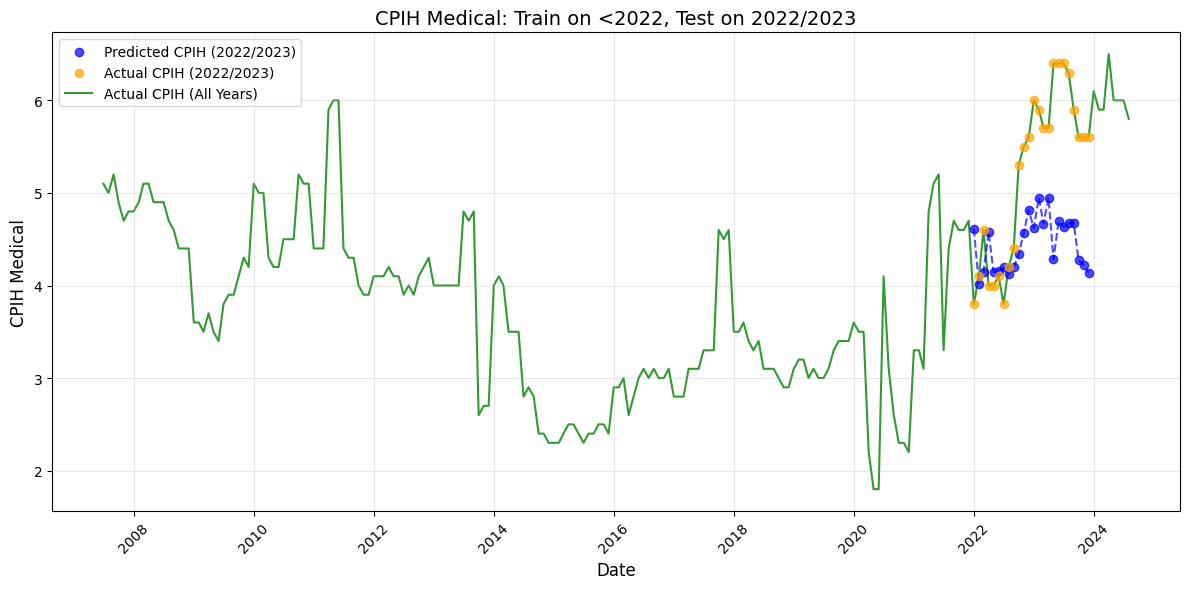

In [1835]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor


train, target = old_bis.drop(columns=['cpih_medical']), old_bis['cpih_medical']
model = RandomForestRegressor(n_estimators=200, criterion='poisson', random_state=42)
model.fit(train, target)


dates_new = pd.to_datetime(new_bis[['year', 'month']].assign(day=1))
dates_all = pd.to_datetime(lag_test_data[['year', 'month']].assign(day=1))
predicted_new = model.predict(new_bis.drop(columns=['cpih_medical']))
actual_new = new_bis['cpih_medical']
actual_all = lag_test_data['cpih_medical']

plt.figure(figsize=(12, 6))
plt.scatter(dates_new, predicted_new, color='blue', alpha=0.7, label='Predicted CPIH (2022/2023)', zorder=2)
plt.scatter(dates_new, actual_new, color='orange', alpha=0.7, label='Actual CPIH (2022/2023)', zorder=2)
plt.plot(dates_new, predicted_new, color='blue', linestyle='--', alpha=0.7, zorder=1)
plt.plot(dates_all, actual_all, color='green', alpha=0.8, label='Actual CPIH (All Years)', zorder=0)


plt.title('CPIH Medical: Train on <2022, Test on 2022/2023', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('CPIH Medical', fontsize=12)
plt.xticks(rotation=45)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [1836]:
old_tris = lag_test_data[lag_test_data['year'] < 2023]
new_tris = lag_test_data[(lag_test_data['year'] >= 2023) | ((lag_test_data['year'] == 2022) & (lag_test_data['month'] >= 7))]



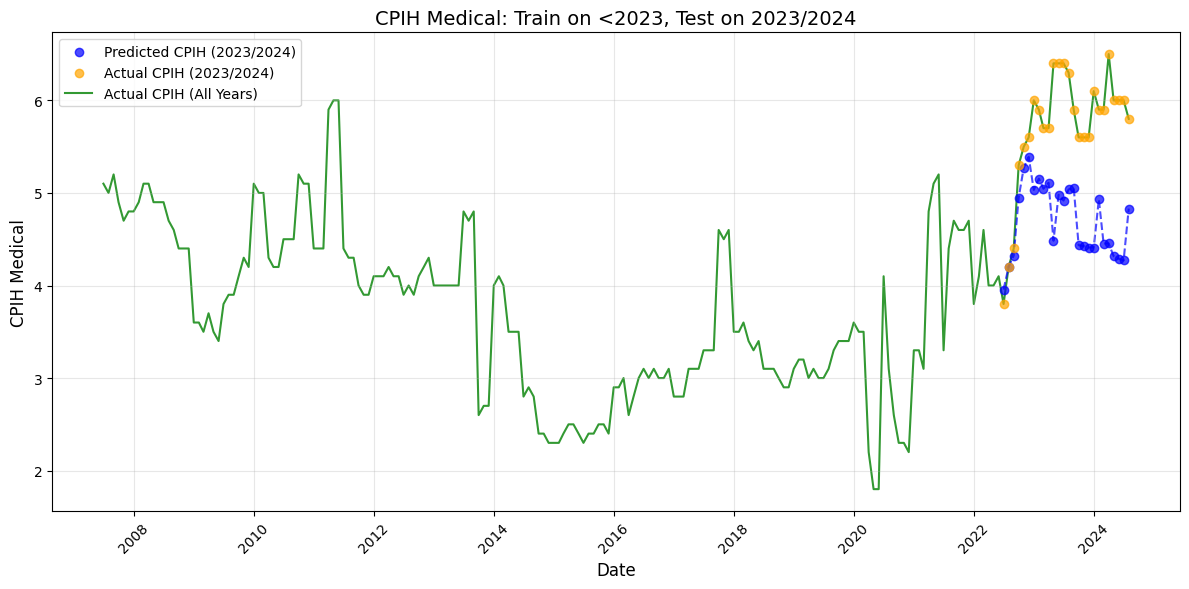

In [1837]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor


train, target = old_tris.drop(columns=['cpih_medical']), old_tris['cpih_medical']
model = RandomForestRegressor(n_estimators=200, criterion='poisson', random_state=42)
model.fit(train, target)


dates_new = pd.to_datetime(new_tris[['year', 'month']].assign(day=1))
dates_all = pd.to_datetime(lag_test_data[['year', 'month']].assign(day=1))
predicted_new = model.predict(new_tris.drop(columns=['cpih_medical']))
actual_new = new_tris['cpih_medical']
actual_all = lag_test_data['cpih_medical']

plt.figure(figsize=(12, 6))
plt.scatter(dates_new, predicted_new, color='blue', alpha=0.7, label='Predicted CPIH (2023/2024)', zorder=2)
plt.scatter(dates_new, actual_new, color='orange', alpha=0.7, label='Actual CPIH (2023/2024)', zorder=2)
plt.plot(dates_new, predicted_new, color='blue', linestyle='--', alpha=0.7, zorder=1)
plt.plot(dates_all, actual_all, color='green', alpha=0.8, label='Actual CPIH (All Years)', zorder=0)


plt.title('CPIH Medical: Train on <2023, Test on 2023/2024', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('CPIH Medical', fontsize=12)
plt.xticks(rotation=45)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


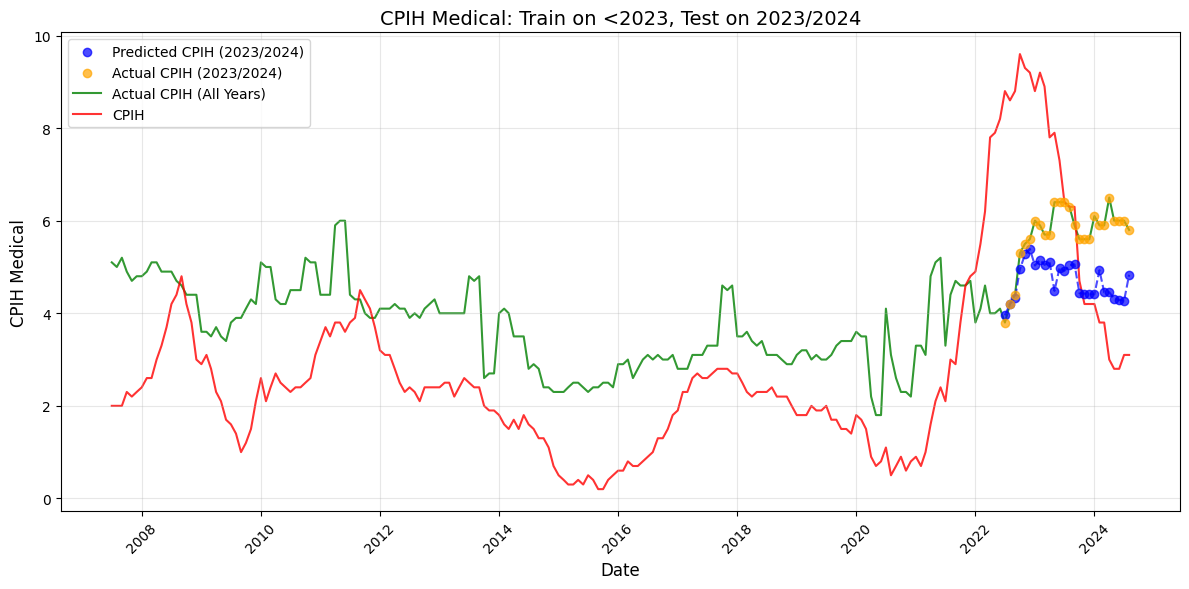

In [1838]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor


train, target = old_tris.drop(columns=['cpih_medical']), old_tris['cpih_medical']
model = RandomForestRegressor(n_estimators=200, criterion='poisson', random_state=42)
model.fit(train, target)


dates_new = pd.to_datetime(new_tris[['year', 'month']].assign(day=1))
dates_all = pd.to_datetime(lag_test_data[['year', 'month']].assign(day=1))
predicted_new = model.predict(new_tris.drop(columns=['cpih_medical']))
actual_new = new_tris['cpih_medical']
actual_all = lag_test_data['cpih_medical']

plt.figure(figsize=(12, 6))
plt.scatter(dates_new, predicted_new, color='blue', alpha=0.7, label='Predicted CPIH (2023/2024)', zorder=2)
plt.scatter(dates_new, actual_new, color='orange', alpha=0.7, label='Actual CPIH (2023/2024)', zorder=2)
plt.plot(dates_new, predicted_new, color='blue', linestyle='--', alpha=0.7, zorder=1)
plt.plot(dates_all, actual_all, color='green', alpha=0.8, label='Actual CPIH (All Years)', zorder=0)
plt.plot(dates_all,lag_test_data['cpih'], color='red', alpha=0.8, label='CPIH', zorder=0)


plt.title('CPIH Medical: Train on <2023, Test on 2023/2024', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('CPIH Medical', fontsize=12)
plt.xticks(rotation=45)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [1839]:
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': train.columns,
    'Importance': feature_importances
})


importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

Feature  Importance
21                cpih_medical_lag_1    0.723362
0                               cpih    0.083195
15   Outpatient_Follow_Up_Attendance    0.022112
18                              year    0.015750
4              APC_Ordinary_Episodes    0.015043
23                cpih_medical_lag_2    0.014029
26                        cpih_lag_3    0.012739
24                        cpih_lag_2    0.012279
22                        cpih_lag_1    0.012279
25                cpih_medical_lag_3    0.012141
19                             month    0.011471
8    APC_Finished_Admission_Episodes    0.009062
13        Outpatient_DNA_Appointment    0.007535
1            APC_Finished_Consultant    0.006143
9                      APC_Emergency    0.005774
6    APC_Day_Case_Episodes_with_proc    0.005381
3    APC_Percent_FCEs_with_procedure    0.004441
16      Outpatient_Attendance_Type_1    0.003725
20                           quarter    0.003718
5              APC_Day_Case_Episodes    0.003528
17      Outpatient_Attendance_Type_2    0.002980
10     Outpatient_Total_Appointments    0.002976
2          APC_FCEs_with_a_procedure    0.002845
12       Outpatient_Percent_Attended    0.002318
11  Outpatient_Attended_Appointments    0.002222
7    APC_Percent_Day_Cases_with_proc    0.001841
14            Outpatient_Percent_DNA    0.001113

In [1840]:
x = lag_test_data.drop(columns=['cpih_medical_lag_1', 'cpih_lag_1', 'cpih_medical_lag_2', 'cpih_lag_2', 'cpih_medical_lag_3', 'cpih_lag_3'])

In [1841]:
old_tris = x[x['year'] < 2023]
new_tris = x[(x['year'] >= 2023) | ((x['year'] == 2022) & (x['month'] >= 7))]



In [1849]:
old_tris

cpih  cpih_medical  APC_Finished_Consultant  APC_FCEs_with_a_procedure  \
3     2.0           5.1                  1301280                     732105   
4     2.0           5.0                  1274667                     719457   
5     2.0           5.2                  1225860                     691203   
6     2.3           4.9                  1354103                     769356   
7     2.2           4.7                  1324595                     757527   
..    ...           ...                      ...                        ...   
184   8.6           4.2                  1656938                    1012816   
185   8.8           4.4                  1649802                    1008170   
186   9.6           5.3                  1687969                    1020323   
187   9.3           5.5                  1757335                    1070336   
188   9.2           5.6                  1617749                     936621   

     APC_Percent_FCEs_with_procedure  APC_Ordinary_Episodes  \
3                               0.56                 898108   
4                               0.56                 884214   
5                               0.56                 851954   
6                               0.57                 919701   
7                               0.57                 895422   
..                               ...                    ...   
184                             0.61                1036926   
185                             0.61                1029335   
186                             0.60                1061715   
187                             0.61                1084288   
188                             0.58                1057154   

     APC_Day_Case_Episodes  APC_Day_Case_Episodes_with_proc  \
3                   403172                           371585   
4                   390453                           360565   
5                   373906                           345563   
6                   434402                           399532   
7                   429173                           396175   
..                     ...                              ...   
184                 620012                           581952   
185                 620467                           582576   
186                 626254                           588232   
187                 673047                           631595   
188                 560595                           524194   

     APC_Percent_Day_Cases_with_proc  APC_Finished_Admission_Episodes  ...  \
3                               0.92                          1141788  ...   
4                               0.92                          1116986  ...   
5                               0.92                          1079019  ...   
6                               0.92                          1190762  ...   
7                               0.92                          1166019  ...   
..                               ...                              ...  ...   
184                             0.94                          1356967  ...   
185                             0.94                          1358340  ...   
186                             0.94                          1385397  ...   
187                             0.94                          1447269  ...   
188                             0.94                          1308269  ...   

     Outpatient_Attended_Appointments  Outpatient_Percent_Attended  \
3                             4657427                         0.80   
4                             4437888                         0.80   
5                             4401026                         0.80   
6                             5018526                         0.80   
7                             4892107                         0.80   
..                                ...                          ...   
184                           7894194                         0.77   
185                           8018502        

In [1856]:
lag_test_data

cpih  cpih_medical  APC_Finished_Consultant  APC_FCEs_with_a_procedure  \
3     2.0           5.1                  1301280                     732105   
4     2.0           5.0                  1274667                     719457   
5     2.0           5.2                  1225860                     691203   
6     2.3           4.9                  1354103                     769356   
7     2.2           4.7                  1324595                     757527   
..    ...           ...                      ...                        ...   
204   3.0           6.5                  1851865                    1102909   
205   2.8           6.0                  1912840                    1132815   
206   2.8           6.0                  1803082                    1060176   
207   3.1           6.0                  1924755                    1115065   
208   3.1           5.8                  1779709                     771329   

     APC_Percent_FCEs_with_procedure  APC_Ordinary_Episodes  \
3                               0.56                 898108   
4                               0.56                 884214   
5                               0.56                 851954   
6                               0.57                 919701   
7                               0.57                 895422   
..                               ...                    ...   
204                             0.60                1149797   
205                             0.59                1189323   
206                             0.59                1126624   
207                             0.58                1183777   
208                             0.43                1103475   

     APC_Day_Case_Episodes  APC_Day_Case_Episodes_with_proc  \
3                   403172                           371585   
4                   390453                           360565   
5                   373906                           345563   
6                   434402                           399532   
7                   429173                           396175   
..                     ...                              ...   
204                 702068                           655541   
205                 723517                           674431   
206                 676458                           628675   
207                 740978                           682257   
208                 676234                           495560   

     APC_Percent_Day_Cases_with_proc  APC_Finished_Admission_Episodes  ...  \
3                               0.92                          1141788  ...   
4                               0.92                          1116986  ...   
5                               0.92                          1079019  ...   
6                               0.92                          1190762  ...   
7                               0.92                          1166019  ...   
..                               ...                              ...  ...   
204                             0.93                          1516960  ...   
205                             0.93                          1571634  ...   
206                             0.93                          1479951  ...   
207                             0.92                          1579131  ...   
208                             0.73                          1461354  ...   

     Outpatient_Attendance_Type_2  year  month  quarter  cpih_medical_lag_1  \
3                         3230369  2007      7        3                 4.9   
4                         3070449  2007      8        3                 5.1   
5                         3040218  2007      9        3                 5.0   
6                         3477759  2007     10        4                 5.2   
7                         3390647  2007     11        4                 4.9   
..                            ...   ...    ...      ...                 ...   
204                       6131796  2024      4      

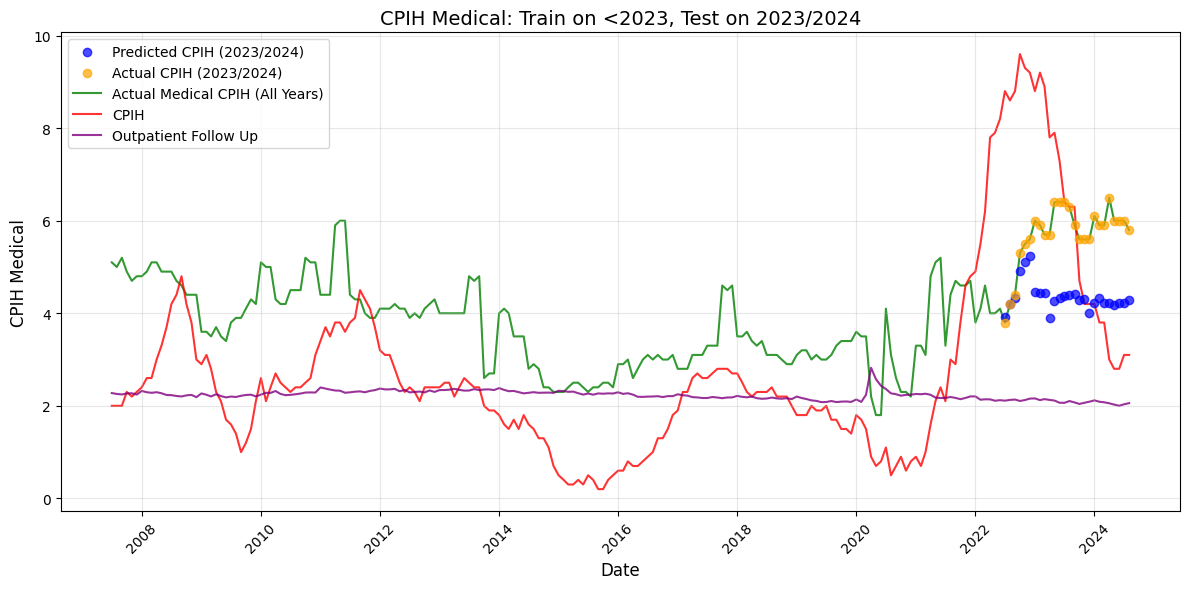

In [1865]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor


train, target =  old_tris.drop(columns=['cpih_medical','year']), old_tris['cpih_medical'] #old_tris['cpih'].to_frame(), old_tris['cpih_medical']
model = RandomForestRegressor(n_estimators=200, criterion='poisson', random_state=42)
model.fit(train, target)


dates_new = pd.to_datetime(new_tris[['year', 'month']].assign(day=1))
dates_all = pd.to_datetime(lag_test_data[['year', 'month']].assign(day=1))
predicted_new = model.predict(new_tris.drop(columns=['cpih_medical','year']))
actual_new = new_tris['cpih_medical']
actual_all = lag_test_data['cpih_medical']

plt.figure(figsize=(12, 6))
plt.scatter(dates_new, predicted_new, color='blue', alpha=0.7, label='Predicted CPIH (2023/2024)', zorder=2)
plt.scatter(dates_new, actual_new, color='orange', alpha=0.7, label='Actual CPIH (2023/2024)', zorder=2)
# plt.plot(dates_new, predicted_new, color='blue', linestyle='--', alpha=0.7, zorder=1)
plt.plot(dates_all, actual_all, color='green', alpha=0.8, label='Actual Medical CPIH (All Years)', zorder=0)
plt.plot(dates_all,lag_test_data['cpih'], color='red', alpha=0.8, label='CPIH', zorder=0)
plt.plot(dates_all,lag_test_data['Outpatient_Follow_Up_Attendance'], color='purple', alpha=0.8, label='Outpatient Follow Up', zorder=0)

plt.title('CPIH Medical: Train on <2023, Test on 2023/2024', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('CPIH Medical', fontsize=12)
plt.xticks(rotation=45)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


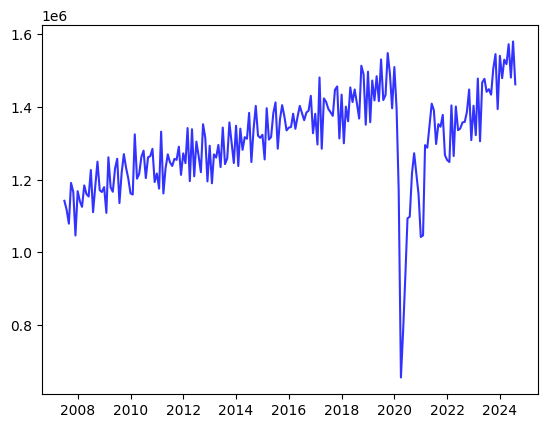

In [1864]:
plt.plot(dates_all,lag_test_data['APC_Finished_Admission_Episodes'], color='blue', alpha=0.8, label='Outpatient New', zorder=0)

In [1866]:
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': train.columns,
    'Importance': feature_importances
})


importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

Feature  Importance
0                               cpih    0.588930
15   Outpatient_Follow_Up_Attendance    0.048867
8    APC_Finished_Admission_Episodes    0.042120
6    APC_Day_Case_Episodes_with_proc    0.038523
13        Outpatient_DNA_Appointment    0.036773
9                      APC_Emergency    0.031656
4              APC_Ordinary_Episodes    0.028007
18                             month    0.026286
16      Outpatient_Attendance_Type_1    0.022642
1            APC_Finished_Consultant    0.020479
10     Outpatient_Total_Appointments    0.020233
5              APC_Day_Case_Episodes    0.019115
17      Outpatient_Attendance_Type_2    0.014377
11  Outpatient_Attended_Appointments    0.012409
2          APC_FCEs_with_a_procedure    0.010895
19                           quarter    0.010622
7    APC_Percent_Day_Cases_with_proc    0.009635
3    APC_Percent_FCEs_with_procedure    0.009172
12       Outpatient_Percent_Attended    0.005614
14            Outpatient_Percent_DNA    0.003646

In [1868]:
input_data['date'] = pd.to_datetime(input_data[['year','month']].assign(day=1))

In [1869]:
input_data

cpih  APC_Finished_Consultant  APC_FCEs_with_a_procedure  \
0     2.7                  1194041                     650418   
1     2.5                  1307117                     730827   
2     2.5                  1266654                     715102   
3     2.0                  1301280                     732105   
4     2.0                  1274667                     719457   
..    ...                      ...                        ...   
204   3.0                  1851865                    1102909   
205   2.8                  1912840                    1132815   
206   2.8                  1803082                    1060176   
207   3.1                  1924755                    1115065   
208   3.1                  1779709                     771329   

     APC_Percent_FCEs_with_procedure  APC_Ordinary_Episodes  \
0                               0.54                 839651   
1                               0.56                 906009   
2                               0.56                 876009   
3                               0.56                 898108   
4                               0.56                 884214   
..                               ...                    ...   
204                             0.60                1149797   
205                             0.59                1189323   
206                             0.59                1126624   
207                             0.58                1183777   
208                             0.43                1103475   

     APC_Day_Case_Episodes  APC_Day_Case_Episodes_with_proc  \
0                   354390                           324717   
1                   401108                           367953   
2                   390645                           359944   
3                   403172                           371585   
4                   390453                           360565   
..                     ...                              ...   
204                 702068                           655541   
205                 723517                           674431   
206                 676458                           628675   
207                 740978                           682257   
208                 676234                           495560   

     APC_Percent_Day_Cases_with_proc  APC_Finished_Admission_Episodes  \
0                               0.92                          1045931   
1                               0.92                          1147940   
2                               0.92                          1111356   
3                               0.92                          1141788   
4                               0.92                          1116986   
..                               ...                              ...   
204                             0.93                          1516960   
205                             0.93                          1571634   
206                             0.93                          1479951   
207                             0.92                          1579131   
208                             0.73                          1461354   

     APC_Emergency  ...  Outpatient_Attended_Appointments  \
0           387887  ...                           4160949   
1           407946  ...                           4587402   
2           390411  ...                           4482970   
3           397923  ...                           4657427   
4           391334  ...                           4437888   
..             ...  ...                               ...   
204         557776  ...                           9116287   
205         575755  ...                           9307137   
206         542409  ...                           8754674   
207         561228  ...                           9557550   
208         518319  ...                           8414975   

     Outpatient_Percent_Attended  Outpatient_DNA_Appointment  \
0                           0.80    

In [1872]:
date1 = pd.to_datetime('2024-01-01')
before_month = date1 - pd.DateOffset(months=1)

In [1873]:
before_month


Timestamp('2023-12-01 00:00:00')

In [1876]:
joined_data['date'] = pd.to_datetime(joined_data[['year','month']].assign(day=1))

In [1900]:
HES_data = ['APC_Finished_Consultant',
       'APC_FCEs_with_a_procedure', 'APC_Percent_FCEs_with_procedure',
       'APC_Ordinary_Episodes', 'APC_Day_Case_Episodes',
       'APC_Day_Case_Episodes_with_proc', 'APC_Percent_Day_Cases_with_proc',
       'APC_Finished_Admission_Episodes', 'APC_Emergency',
       'Outpatient_Total_Appointments', 'Outpatient_Attended_Appointments',
       'Outpatient_Percent_Attended', 'Outpatient_DNA_Appointment',
       'Outpatient_Percent_DNA', 'Outpatient_Follow_Up_Attendance',
       'Outpatient_Attendance_Type_1', 'Outpatient_Attendance_Type_2']

In [1909]:
final_data = pd.DataFrame(columns=['date'])
final_data['date'] = joined_data['date']
final_data['target'] = joined_data['cpih_medical']
final_data['cpim_lag1'] = joined_data['cpih_medical'].shift(1)
final_data['cpim_lag2'] = joined_data['cpih_medical'].shift(2)
final_data['cpim_lag3'] = joined_data['cpih_medical'].shift(3)
final_data['cpih_lag1'] = joined_data['cpih'].shift(1)
final_data['cpih_lag2'] = joined_data['cpih'].shift(2)
final_data['cpih_lag3'] = joined_data['cpih'].shift(3)
final_data[HES_data] = joined_data[HES_data].shift(1)


In [1910]:
final_data.dropna(inplace=True)

In [1911]:
final_data

date  target  cpim_lag1  cpim_lag2  cpim_lag3  cpih_lag1  cpih_lag2  \
3   2007-07-01     5.1        4.9        4.6        4.8        2.5        2.5   
4   2007-08-01     5.0        5.1        4.9        4.6        2.0        2.5   
5   2007-09-01     5.2        5.0        5.1        4.9        2.0        2.0   
6   2007-10-01     4.9        5.2        5.0        5.1        2.0        2.0   
7   2007-11-01     4.7        4.9        5.2        5.0        2.3        2.0   
..         ...     ...        ...        ...        ...        ...        ...   
204 2024-04-01     6.5        5.9        5.9        6.1        3.8        3.8   
205 2024-05-01     6.0        6.5        5.9        5.9        3.0        3.8   
206 2024-06-01     6.0        6.0        6.5        5.9        2.8        3.0   
207 2024-07-01     6.0        6.0        6.0        6.5        2.8        2.8   
208 2024-08-01     5.8        6.0        6.0        6.0        3.1        2.8   

     cpih_lag3  APC_Finished_Consultant  APC_FCEs_with_a_procedure  ...  \
3          2.7                1266654.0                   715102.0  ...   
4          2.5                1301280.0                   732105.0  ...   
5          2.5                1274667.0                   719457.0  ...   
6          2.0                1225860.0                   691203.0  ...   
7          2.0                1354103.0                   769356.0  ...   
..         ...                      ...                        ...  ...   
204        4.2                1855318.0                  1071637.0  ...   
205        3.8                1851865.0                  1102909.0  ...   
206        3.8                1912840.0                  1132815.0  ...   
207        3.0                1803082.0                  1060176.0  ...   
208        2.8                1924755.0                  1115065.0  ...   

     APC_Finished_Admission_Episodes  APC_Emergency  \
3                          1111356.0       390411.0   
4                          1141788.0       397923.0   
5                          1116986.0       391334.0   
6                          1079019.0       376896.0   
7                          1190762.0       410475.0   
..                               ...            ...   
204                        1529117.0       573401.0   
205                        1516960.0       557776.0   
206                        1571634.0       575755.0   
207                        1479951.0       542409.0   
208                        1579131.0       561228.0   

     Outpatient_Total_Appointments  Outpatient_Attended_Appointments  \
3                        5497138.0                         4482970.0   
4                        5743307.0                         4657427.0   
5                        5475792.0                         4437888.0   
6                        5438116.0                         4401026.0   
7                        6144081.0                         5018526.0   
..                             ...                               ...   
204                     11176694.0                         8710477.0   
205                     11749634.0                         9116287.0   
206                     11955525.0                         9307137.0   
207                     11345191.0                         8754674.0   
208                     12447345.0                         9557550.0   

     Outpatient_Percent_Attended  Outpatient_DNA_Appointment  \
3                           0.80                    465544.0   
4                           0.80                    476312.0   
5                           0.80                    459439.0   
6                           0.80                    460482.0   
7                           0.80                    522083.0   
..                           ...                         ...   
204                         0.78                    625936.0   
205                         0.78                    665686.0   
206                         0.78  

In [1950]:
train,test, train_target, test_target = final_data[final_data['date'] < '2023-01-01'].drop(columns=['date','target']), final_data[final_data['date'] >= '2023-01-01'].drop(columns=['date','target']), final_data[final_data['date'] < '2023-01-01']['target'], final_data[final_data['date'] >= '2023-01-01']['target']


In [1951]:
model = RandomForestRegressor(n_estimators=200, criterion='poisson', random_state=42)
model.fit(train, train_target)

RandomForestRegressor(criterion='poisson', n_estimators=200, random_state=42)

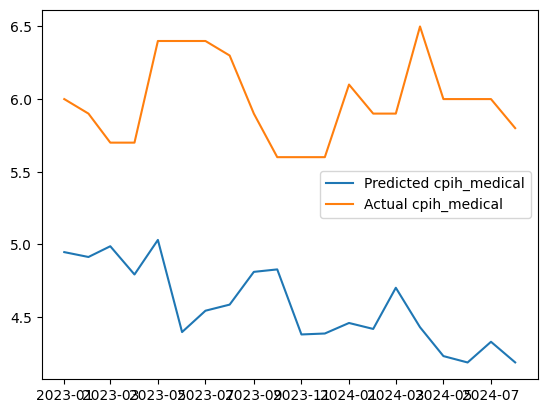

In [1952]:
plt.plot(final_data[final_data['date']>= '2023-01-01']['date'], model.predict(test), label='Predicted cpih_medical')
plt.plot(final_data[final_data['date']>= '2023-01-01']['date'], test_target, label='Actual cpih_medical')
plt.legend()

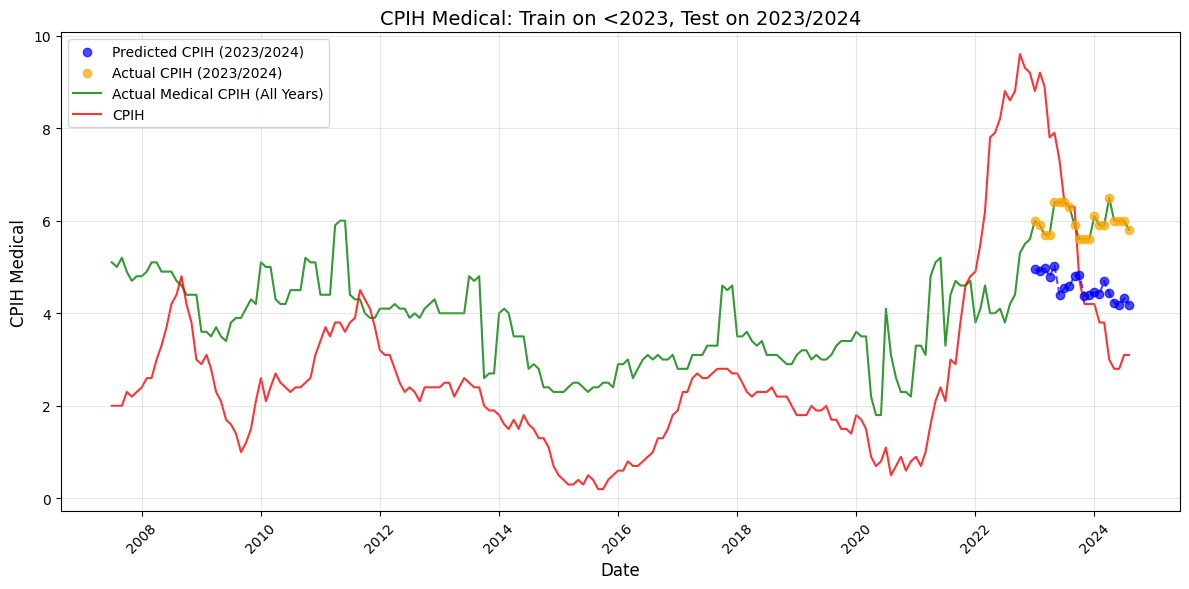

In [1957]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor


dates_new = final_data[final_data['date']>= '2023-01-01']['date']
dates_all = final_data['date']
predicted_new = model.predict(test)
actual_new = test_target
actual_all = final_data['target']

plt.figure(figsize=(12, 6))
plt.scatter(dates_new, predicted_new, color='blue', alpha=0.7, label='Predicted CPIH (2023/2024)', zorder=2)
plt.scatter(dates_new, actual_new, color='orange', alpha=0.7, label='Actual CPIH (2023/2024)', zorder=2)
plt.plot(dates_new, predicted_new, color='blue', linestyle='--', alpha=0.7, zorder=1)
plt.plot(dates_all, actual_all, color='green', alpha=0.8, label='Actual Medical CPIH (All Years)', zorder=0)
plt.plot(dates_all,lag_test_data['cpih'], color='red', alpha=0.8, label='CPIH', zorder=0)
#plt.plot(dates_all,lag_test_data['Outpatient_Follow_Up_Attendance'], color='purple', alpha=0.8, label='Outpatient Follow Up', zorder=0)

plt.title('CPIH Medical: Train on <2023, Test on 2023/2024', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('CPIH Medical', fontsize=12)
plt.xticks(rotation=45)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [1924]:
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': train.columns,
    'Importance': feature_importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

Feature  Importance
0                          cpim_lag1    0.807642
3                          cpih_lag1    0.028872
20   Outpatient_Follow_Up_Attendance    0.020626
1                          cpim_lag2    0.016231
5                          cpih_lag3    0.014343
2                          cpim_lag3    0.014206
18        Outpatient_DNA_Appointment    0.012107
4                          cpih_lag2    0.011372
17       Outpatient_Percent_Attended    0.010797
14                     APC_Emergency    0.009244
9              APC_Ordinary_Episodes    0.006377
8    APC_Percent_FCEs_with_procedure    0.005464
11   APC_Day_Case_Episodes_with_proc    0.005342
10             APC_Day_Case_Episodes    0.004961
21      Outpatient_Attendance_Type_1    0.004939
15     Outpatient_Total_Appointments    0.004571
6            APC_Finished_Consultant    0.004199
13   APC_Finished_Admission_Episodes    0.004168
12   APC_Percent_Day_Cases_with_proc    0.003638
16  Outpatient_Attended_Appointments    0.003497
22      Outpatient_Attendance_Type_2    0.003198
7          APC_FCEs_with_a_procedure    0.002574
19            Outpatient_Percent_DNA    0.001632

In [1954]:
from sklearn.ensemble import GradientBoostingRegressor

model_boost = GradientBoostingRegressor(n_estimators=200, random_state=42)
model_boost.fit(train, train_target)


GradientBoostingRegressor(n_estimators=200, random_state=42)

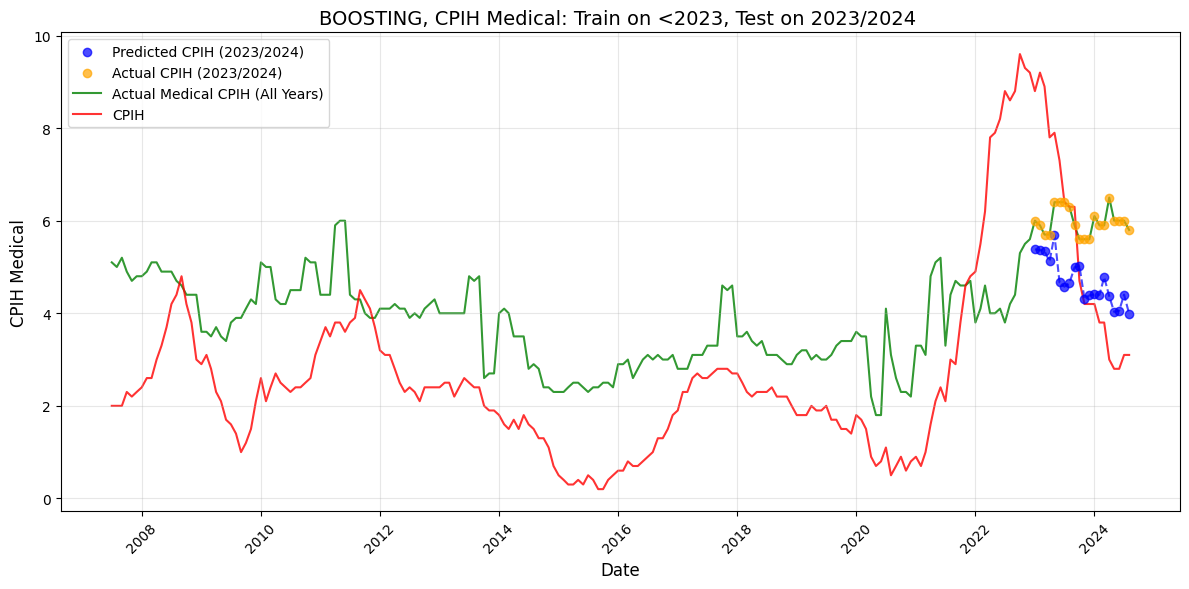

In [1956]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor


dates_new = final_data[final_data['date']>= '2023-01-01']['date']
dates_all = final_data['date']
predicted_new = model_boost.predict(test)
actual_new = test_target
actual_all = final_data['target']

plt.figure(figsize=(12, 6))
plt.scatter(dates_new, predicted_new, color='blue', alpha=0.7, label='Predicted CPIH (2023/2024)', zorder=2)
plt.scatter(dates_new, actual_new, color='orange', alpha=0.7, label='Actual CPIH (2023/2024)', zorder=2)
plt.plot(dates_new, predicted_new, color='blue', linestyle='--', alpha=0.7, zorder=1)
plt.plot(dates_all, actual_all, color='green', alpha=0.8, label='Actual Medical CPIH (All Years)', zorder=0)
plt.plot(dates_all,lag_test_data['cpih'], color='red', alpha=0.8, label='CPIH', zorder=0)
#plt.plot(dates_all,lag_test_data['Outpatient_Follow_Up_Attendance'], color='purple', alpha=0.8, label='Outpatient Follow Up', zorder=0)

plt.title('BOOSTING, CPIH Medical: Train on <2023, Test on 2023/2024 ', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('CPIH Medical', fontsize=12)
plt.xticks(rotation=45)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [1932]:
feature_importances = model_boost.feature_importances_
importance_df = pd.DataFrame({
    'Feature': train.columns,
    'Importance': feature_importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

Feature  Importance
0                          cpim_lag1    0.807827
3                          cpih_lag1    0.021244
1                          cpim_lag2    0.016613
18        Outpatient_DNA_Appointment    0.016569
5                          cpih_lag3    0.015875
2                          cpim_lag3    0.014655
20   Outpatient_Follow_Up_Attendance    0.014370
22      Outpatient_Attendance_Type_2    0.012249
4                          cpih_lag2    0.011471
9              APC_Ordinary_Episodes    0.010013
17       Outpatient_Percent_Attended    0.009949
11   APC_Day_Case_Episodes_with_proc    0.007477
15     Outpatient_Total_Appointments    0.006911
14                     APC_Emergency    0.005823
16  Outpatient_Attended_Appointments    0.005654
10             APC_Day_Case_Episodes    0.005001
13   APC_Finished_Admission_Episodes    0.004736
21      Outpatient_Attendance_Type_1    0.003917
12   APC_Percent_Day_Cases_with_proc    0.003763
6            APC_Finished_Consultant    0.002255
7          APC_FCEs_with_a_procedure    0.002014
8    APC_Percent_FCEs_with_procedure    0.001539
19            Outpatient_Percent_DNA    0.000075

In [1937]:
train,test, train_target, test_target = final_data[(final_data['date'] < '2016-01-01')|(final_data['date'] >= '2019-01-01')].drop(columns=['date','target']), final_data[(final_data['date'] >= '2016-01-01') & (final_data['date'] < '2019-01-01')].drop(columns=['date','target']), final_data[(final_data['date'] < '2016-01-01')|(final_data['date'] >= '2019-01-01')]['target'], final_data[(final_data['date'] >= '2016-01-01') & (final_data['date'] < '2019-01-01')]['target']


In [1938]:
train 

cpim_lag1  cpim_lag2  cpim_lag3  cpih_lag1  cpih_lag2  cpih_lag3  \
3          4.9        4.6        4.8        2.5        2.5        2.7   
4          5.1        4.9        4.6        2.0        2.5        2.5   
5          5.0        5.1        4.9        2.0        2.0        2.5   
6          5.2        5.0        5.1        2.0        2.0        2.0   
7          4.9        5.2        5.0        2.3        2.0        2.0   
..         ...        ...        ...        ...        ...        ...   
204        5.9        5.9        6.1        3.8        3.8        4.2   
205        6.5        5.9        5.9        3.0        3.8        3.8   
206        6.0        6.5        5.9        2.8        3.0        3.8   
207        6.0        6.0        6.5        2.8        2.8        3.0   
208        6.0        6.0        6.0        3.1        2.8        2.8   

     APC_Finished_Consultant  APC_FCEs_with_a_procedure  \
3                  1266654.0                   715102.0   
4                  1301280.0                   732105.0   
5                  1274667.0                   719457.0   
6                  1225860.0                   691203.0   
7                  1354103.0                   769356.0   
..                       ...                        ...   
204                1855318.0                  1071637.0   
205                1851865.0                  1102909.0   
206                1912840.0                  1132815.0   
207                1803082.0                  1060176.0   
208                1924755.0                  1115065.0   

     APC_Percent_FCEs_with_procedure  APC_Ordinary_Episodes  ...  \
3                               0.56               876009.0  ...   
4                               0.56               898108.0  ...   
5                               0.56               884214.0  ...   
6                               0.56               851954.0  ...   
7                               0.57               919701.0  ...   
..                               ...                    ...  ...   
204                             0.58              1167686.0  ...   
205                             0.60              1149797.0  ...   
206                             0.59              1189323.0  ...   
207                             0.59              1126624.0  ...   
208                             0.58              1183777.0  ...   

     APC_Finished_Admission_Episodes  APC_Emergency  \
3                          1111356.0       390411.0   
4                          1141788.0       397923.0   
5                          1116986.0       391334.0   
6                          1079019.0       376896.0   
7                          1190762.0       410475.0   
..                               ...            ...   
204                        1529117.0       573401.0   
205                        1516960.0       557776.0   
206                        1571634.0       575755.0   
207                        1479951.0       542409.0   
208                        1579131.0       561228.0   

     Outpatient_Total_Appointments  Outpatient_Attended_Appointments  \
3                        5497138.0                         4482970.0   
4                        5743307.0                         4657427.0   
5                        5475792.0                         4437888.0   
6                        5438116.0                         4401026.0   
7                        6144081.0                         5018526.0   
..                             ...                               ...   
204                     11176694.0                         8710477.0   
205                     11749634.0                         9116287.0   
206                     11955525.0                         9307137.0   
207                     11345191.0                         8754674.0   
208                     12447345.0                         9557550.0   

     Outpatient_Percent_Attended  Outpatient_DNA_Appointment  \
3           

In [1939]:
model = RandomForestRegressor(n_estimators=200, criterion='absolute_error', random_state=42)
model.fit(train, train_target)

RandomForestRegressor(criterion='absolute_error', n_estimators=200,
                      random_state=42)

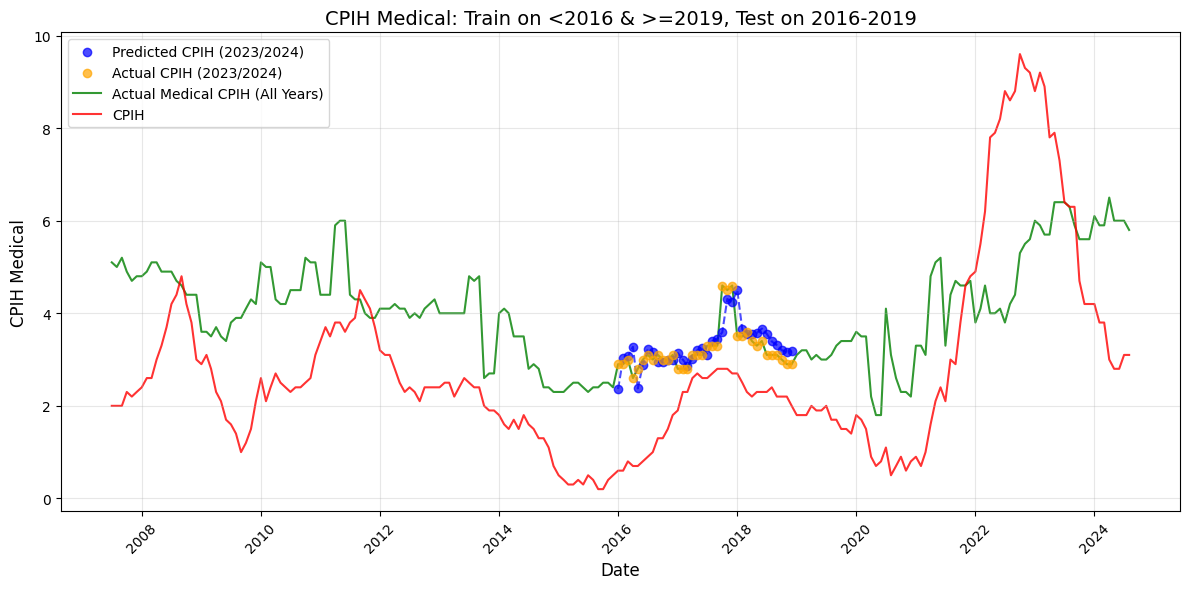

In [1944]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor


dates_new = final_data[(final_data['date'] >= '2016-01-01') & (final_data['date'] < '2019-01-01')]['date']
dates_all = final_data['date']
predicted_new = model.predict(test)
actual_new = test_target
actual_all = final_data['target']

plt.figure(figsize=(12, 6))
plt.scatter(dates_new, predicted_new, color='blue', alpha=0.7, label='Predicted CPIH (2023/2024)', zorder=2)
plt.scatter(dates_new, actual_new, color='orange', alpha=0.7, label='Actual CPIH (2023/2024)', zorder=2)
plt.plot(dates_new, predicted_new, color='blue', linestyle='--', alpha=0.7, zorder=1)
plt.plot(dates_all, actual_all, color='green', alpha=0.8, label='Actual Medical CPIH (All Years)', zorder=0)
plt.plot(dates_all,lag_test_data['cpih'], color='red', alpha=0.8, label='CPIH', zorder=0)
#plt.plot(dates_all,lag_test_data['Outpatient_Follow_Up_Attendance'], color='purple', alpha=0.8, label='Outpatient Follow Up', zorder=0)

plt.title('CPIH Medical: Train on <2016 & >=2019, Test on 2016-2019', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('CPIH Medical', fontsize=12)
plt.xticks(rotation=45)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [1964]:
train,test, train_target, test_target = final_data[final_data['date'] < '2021-01-01'].drop(columns=['date','target']), final_data[final_data['date'] >= '2021-01-01'].drop(columns=['date','target']), final_data[final_data['date'] < '2021-01-01']['target'], final_data[final_data['date'] >= '2021-01-01']['target']
model = RandomForestRegressor(n_estimators=200, criterion='poisson', random_state=42)
model.fit(train, train_target)

RandomForestRegressor(criterion='poisson', n_estimators=200, random_state=42)

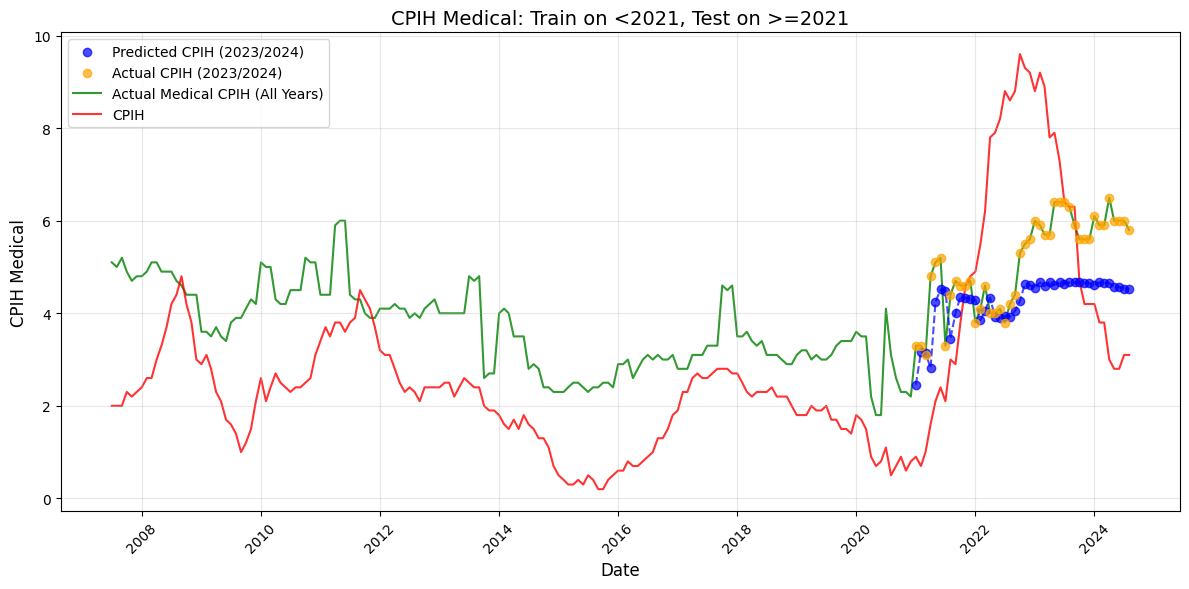

In [1965]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor


dates_new = final_data[final_data['date'] >= '2021-01-01' ]['date']
dates_all = final_data['date']
predicted_new = model.predict(test)
actual_new = test_target
actual_all = final_data['target']

plt.figure(figsize=(12, 6))
plt.scatter(dates_new, predicted_new, color='blue', alpha=0.7, label='Predicted CPIH (2023/2024)', zorder=2)
plt.scatter(dates_new, actual_new, color='orange', alpha=0.7, label='Actual CPIH (2023/2024)', zorder=2)
plt.plot(dates_new, predicted_new, color='blue', linestyle='--', alpha=0.7, zorder=1)
plt.plot(dates_all, actual_all, color='green', alpha=0.8, label='Actual Medical CPIH (All Years)', zorder=0)
plt.plot(dates_all,lag_test_data['cpih'], color='red', alpha=0.8, label='CPIH', zorder=0)
#plt.plot(dates_all,lag_test_data['Outpatient_Follow_Up_Attendance'], color='purple', alpha=0.8, label='Outpatient Follow Up', zorder=0)

plt.title('CPIH Medical: Train on <2021, Test on >=2021', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('CPIH Medical', fontsize=12)
plt.xticks(rotation=45)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [1963]:
train.columns 

Index(['cpim_lag1', 'cpim_lag2', 'cpim_lag3', 'cpih_lag1', 'cpih_lag2',
       'cpih_lag3', 'APC_Finished_Consultant', 'APC_FCEs_with_a_procedure',
       'APC_Percent_FCEs_with_procedure', 'APC_Ordinary_Episodes',
       'APC_Day_Case_Episodes', 'APC_Day_Case_Episodes_with_proc',
       'APC_Percent_Day_Cases_with_proc', 'APC_Finished_Admission_Episodes',
       'APC_Emergency', 'Outpatient_Total_Appointments',
       'Outpatient_Attended_Appointments', 'Outpatient_Percent_Attended',
       'Outpatient_DNA_Appointment', 'Outpatient_Percent_DNA',
       'Outpatient_Follow_Up_Attendance', 'Outpatient_Attendance_Type_1',
       'Outpatient_Attendance_Type_2'],
      dtype='object')

In [1]:
pip install pycaret

  Using cached ipywidgets-8.1.5-py3-none-any.whl.metadata (2.3 kB)
  Using cached numpy-1.26.4-cp311-cp311-macosx_11_0_arm64.whl.metadata (114 kB)
  Preparing metadata (setup.py) ... done
  Using cached lightgbm-4.5.0-py3-none-macosx_12_0_arm64.whl.metadata (17 kB)
  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
  Using cached deprecation-2.1.0-py2.py3-none-any.whl.metadata (4.6 kB)
  Using cached widgetsnbextension-4.0.13-py3-none-any.whl.metadata (1.6 kB)
  Using cached jupyterlab_widgets-3.0.13-py3-none-any.whl.metadata (4.1 kB)
  Using cached fastjsonschema-2.20.0-py3-none-any.whl.metadata (2.1 kB)
  Using cached flask-3.0.3-py3-none-any.whl.metadata (3.2 kB)
  Using cached itsdangerous-2.2.0-py3-none-any.whl.metadata (1.9 kB)
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 44.5 MB/s eta 0:00:00a 0:00:01
Using cached deprecation-2.1.0-py2.py3-none-any.whl (11 kB)
Using cached ipywidgets-8.1.5

In [2]:
from quanti.data_preprocessing import read_cpih, read_hes, get_global_df, get_final_df
cpih_df = read_cpih("quanti/data/cpih.csv", medical=False)
cpim_df = read_cpih("quanti/data/cpih_medical.csv", medical=True)
hes = read_hes("quanti/data/HES_M5_OPEN_DATA.csv")
df = get_global_df(cpih_df, cpim_df, hes)
df = get_final_df(df)
print(df.columns)

ImportError: cannot import name 'HES' from 'constants' (/Users/mayaraayat/Desktop/axa-fall2024-p2/constants.py)

In [ ]:
from pycaret.time_series import *

# Initialize the PyCaret time series experiment
exp = setup(
    data=df[target],            # Pass the target column (series)
    fold=5,                     # Number of cross-validation folds
    session_id=42,              # For reproducibility
    seasonal_period=12,         # If you know the seasonal period, set it
    fh=24,                      # Forecast horizon (number of future periods to predict)
)

# Compare baseline models
best_model = compare_models()

# Get predictions from the best model
final_model = finalize_model(best_model)
future_forecast = predict_model(final_model, fh=24)  # Forecast next 24 periods
print(future_forecast)
